In [1]:
import tweepy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')

API_KEY = 'COIj8nvew4HSyBxikXS5aOjrH'

API_SECRET_KEY = 'DBU3yV9vOGTHYGqEkOwCBHJas58fAycf8Ub6XGAWIutFguVQKs'

BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAAGsIAEAAAAA1IsiuHqy7pXNnf0PRVpphTAC%2Fi0%3DeIIayOofpOWvfTDQzVej5IleNyl3KXWAKx7kG1SkFck8rp5Nh4'

ACCESS_TOKEN = "1272108691525898243-EktacxX5cOOED3jjMNADnkR9KVRZ4z"

ACCESS_SECRET_TOKEN = "PguqJTsMqLK0TwCMJYxfQthYisXoWiJ5vFcUSbHvVXReb"

auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET_TOKEN)

api = tweepy.API(auth)

user = api.me()

user.name

&#39;Martin Njenga&#39;

In [34]:
tweets = []

for page in range(1, 5):
    tweets.extend(api.user_timeline(
        screen_name='RailaOdinga', count=100, page=page))
print("number of tweets extracted will be {}".format(len(tweets)))

number of tweets extracted will be 399


In [35]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted ==
              False and 'RT @' not in tweet.text]
for tweet in own_tweets[:5]:
    print(tweet.text)

Exchanged ideas on Coastal concerns regarding development as well as support for the vulnerable and strengthening o… https://t.co/Ywgyn9iyws
Kenyans working in the healthcare field have gone above and beyond the call of duty as we grapple with COVID 19. I… https://t.co/cZrf9Oot4U
Wound up the 2 day #ODMNEC meeting during which we shared views, compared notes and mapped out party plans. I&#39;ve al… https://t.co/tAvWEFXT0C
As a party, we must not shy or be distracted in our effort to build a truly prosperous nation with a vibrant and in… https://t.co/GlkH4Q1lbX
In the months ahead, we are going into a confrontation with the beneficiaries of proceeds of corruption who are arr… https://t.co/FB0cKlTN3U


In [36]:
df = pd.DataFrame(data=[[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets],
                  columns=['Date', 'Tweets', 'Length of text', 'id', 'Likes', 'Retweets'])
df.head()

,Date,Tweets,Length of text,id,Likes,Retweets
0,2020-10-01 14:31:45,Exchanged ideas on Coastal concerns regarding ...,140,1311675173179973640,1162,115
1,2020-09-28 15:34:53,Kenyans working in the healthcare field have g...,139,1310603895169744904,1562,184
2,2020-09-26 13:14:17,Wound up the 2 day #ODMNEC meeting during whic...,140,1309843737946750978,857,98
3,2020-09-25 15:40:37,"As a party, we must not shy or be distracted i...",140,1309518174984056832,700,115
4,2020-09-25 11:04:43,"In the months ahead, we are going into a confr...",140,1309448743805124609,1362,198


In [37]:
df[df['Likes'] == df['Likes'].max()]['Tweets']

101    #GeorgeFloyd #JusticeForGeorgeFloyd https://t....
Name: Tweets, dtype: object

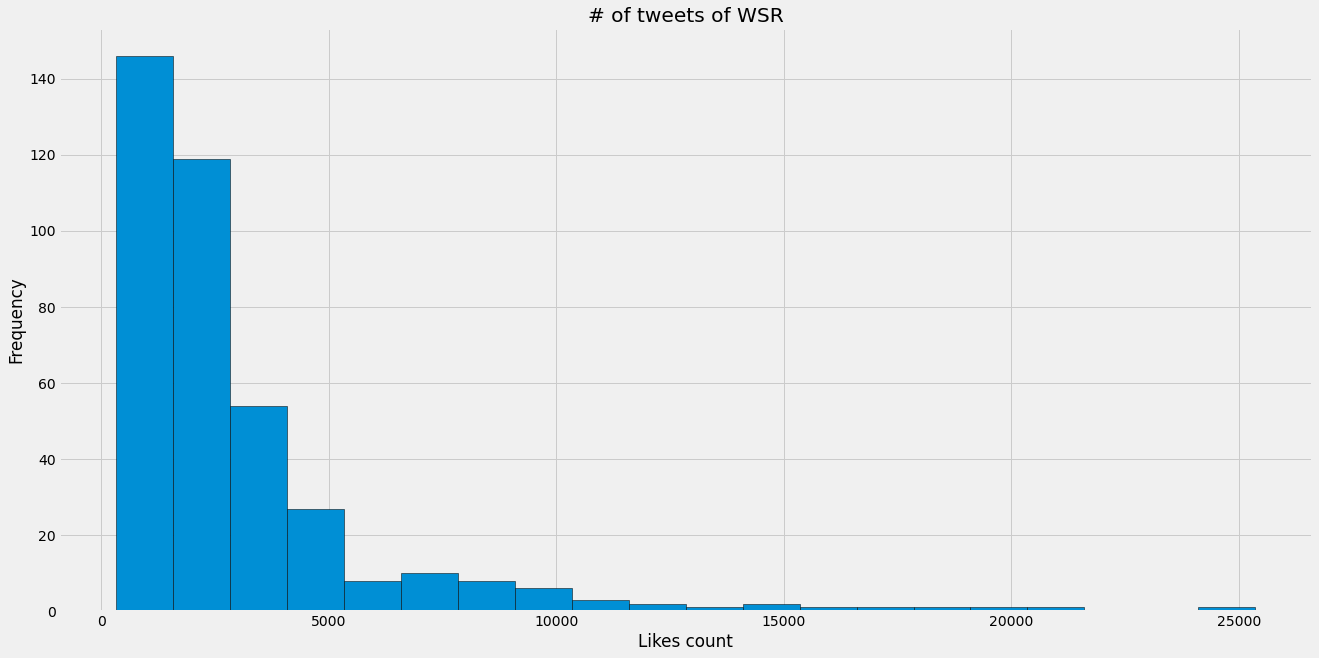

In [12]:
df['Likes'].plot(kind='hist', bins=20, figsize=(20, 10), ec='black')
plt.xlabel('Likes count')
plt.ylabel('Frequency')
plt.title('# of tweets of WSR')
plt.show()

In [38]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /home/martin-
[nltk_data]     kinaro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
vader = SentimentIntensityAnalyzer()

f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweets'].apply(f)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,Date,Tweets,Length of text,id,Likes,Retweets,Sentiment
0,2020-10-01,Exchanged ideas on Coastal concerns regarding ...,140,1311675173179973640,1162,115,0.7269
1,2020-09-28,Kenyans working in the healthcare field have g...,139,1310603895169744904,1562,184,0.0000
2,2020-09-26,Wound up the 2 day #ODMNEC meeting during whic...,140,1309843737946750978,857,98,0.6249
3,2020-09-25,"As a party, we must not shy or be distracted i...",140,1309518174984056832,700,115,0.8870
4,2020-09-25,"In the months ahead, we are going into a confr...",140,1309448743805124609,1362,198,0.1280


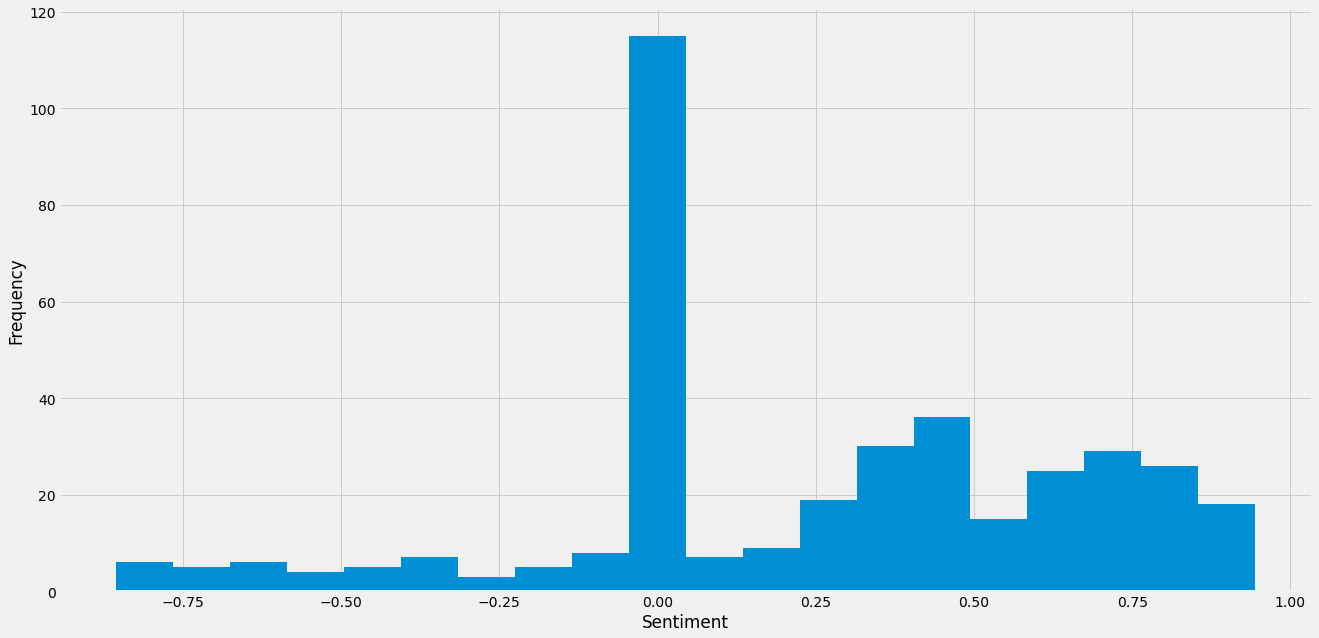

In [40]:
df['Sentiment'].plot(kind='hist', bins=20, figsize=(20,10))
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, &#39;Average sentiment analysis of WSR tweets against time&#39;)

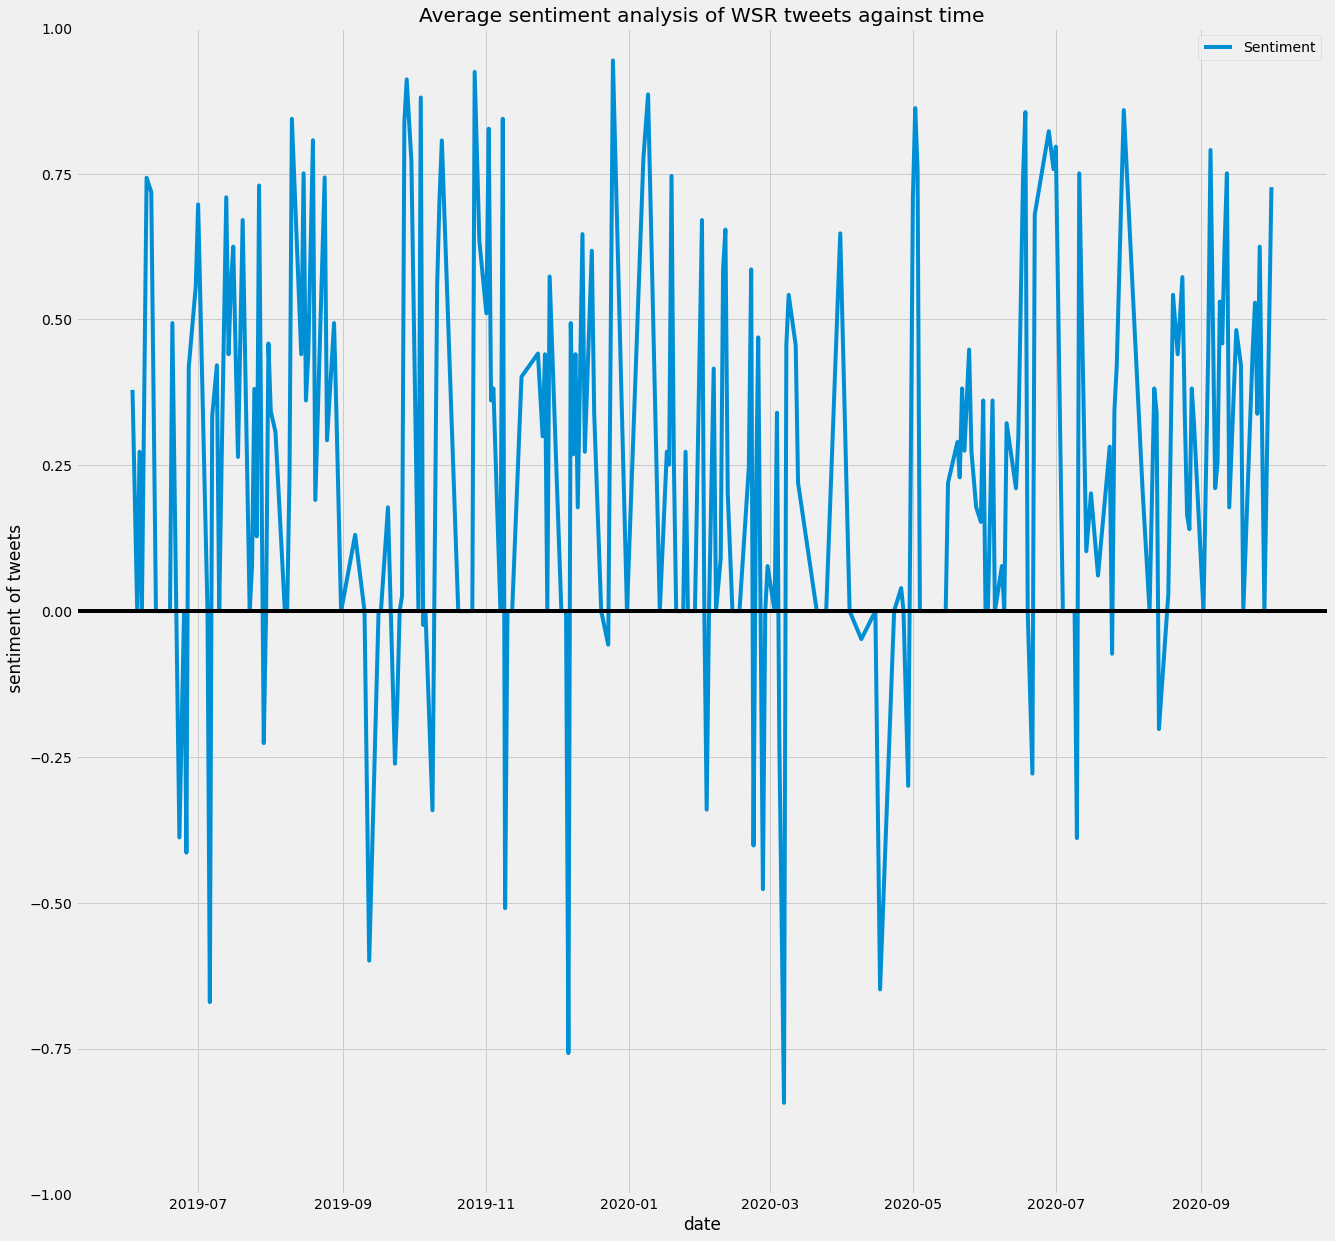

In [41]:
date_df = df.groupby(['Date']).mean().reset_index()
# date_df.head()
date_df.plot(kind='line', x="Date",y='Sentiment', figsize=(20,20), ylim=[-1,1])
plt.axhline(y=0, color='black')
plt.xlabel('date')
plt.ylabel(' sentiment of tweets')
plt.title('Average sentiment analysis of WSR tweets against time')

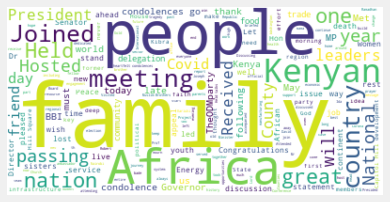

In [42]:
from wordcloud import WordCloud, STOPWORDS

text =  ' '.join(text for text in df.Tweets)

stopwords = set(STOPWORDS)

stopwords.update(['HTTPS', 'CO'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
t = df.Tweets
print(t)

0      Exchanged ideas on Coastal concerns regarding ...
1      Kenyans working in the healthcare field have g...
2      Wound up the 2 day #ODMNEC meeting during whic...
3      As a party, we must not shy or be distracted i...
4      In the months ahead, we are going into a confr...
                             ...                        
373    Joined the Russia- Africa panel at the #SPIEF2...
374    Attended the Energy Panel at the St. Petersbur...
375    Held talks in London with the President of Sie...
376    #EidMubarak to all our Muslim Brothers and Sis...
377    He advocated an end to the old notion that sta...
Name: Tweets, Length: 378, dtype: object
